In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from glob import glob
import os
import torch
from fipy_analysis import *
import logging
logging.getLogger().setLevel(logging.WARNING)

print(torch.cuda.is_available())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
True


# Analysis of trained models

Right now, three models are available in the `models` subdirectory. The training configurations only differ by the hyperparameters $\alpha$, $\beta$. In a nutshell, $\alpha$ emphasizes the predictive power without the extra NN growth term, while $\beta$ emphasizes predictive power of a polynomial approximation to the NN growth term. It seems like the best predictions occur with $\alpha, \beta$ turned off, but the learned coefficients seem consistent across all three models

| Datestamp | Timestamp | $\alpha$ | $\beta$ | Grouped | $R^2$ Black | $R^2$ White |
| --------- | --------- | -------- | ------- | ------- | ----------- | ----------- |
| 200824    | 1630      | 1        | 0       | No      | 0.89        | 0.69        |
| 200824    | 1631      | 1        | 1       | No      | 0.95        | 0.68        |
| 200824    | 1632      | 0        | 0       | No      | 0.93        | 0.81        |
| 210824    | 1600      | 0        | 1       | No      | | |
| 210824    | 1556      | 0        | 0       | Yes      | | |
| 210824    | 1557      | 1        | 0       | Yes      | | |
| 210824    | 1558      | 1        | 1       | Yes      | | |
| 210824    | 1559      | 0        | 1       | Yes      | | |



In [4]:
model_dirs = sorted(glob(os.path.join("models_census", "*")))
model_dirs

['models_census/Georgia_Fulton_noGrid_SociohydroParameterNetwork_20240830_1715',
 'models_census/Georgia_Fulton_noGrid_SociohydroParameterNetwork_20240831_160446',
 'models_census/Georgia_Fulton_noGrid_SociohydroParameterNetwork_20240831_160502',
 'models_census/Georgia_Fulton_noGrid_SociohydroParameterNetwork_20240831_160535',
 'models_census/Illinois_Cook_noGrid_SociohydroParameterNetwork_20240830_1722',
 'models_census/Illinois_Cook_noGrid_SociohydroParameterNetwork_20240831_160550',
 'models_census/Illinois_Cook_noGrid_SociohydroParameterNetwork_20240831_160622',
 'models_census/Illinois_Cook_noGrid_SociohydroParameterNetwork_20240831_160638']

/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

{'alpha': 1.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 0.0,
 'coef_lr': 0.1,
 'county': 'Georgia_Fulton',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped': False,
 'region': 'all',
 'savefolder': '/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/models_census',
 'scheduler_step': 0.98,
 'sigma': 10.0,
 'val_split': 0.5}
dt ϕW = 1.9 T_W + -2.4 k_WW + 0.77 k_WB + -1.1 ν_WWW + 0.4 ν_WWB + 0.75 ν_WBB + -0.11 Γ_W + NN(['ϕW', 'ϕB'])
dt ϕB = 1.6 T_B + -0.24 k_BB + 0.3 k_BW + 0.25 ν_BBB + 1.3 ν_BWB + 0.21 ν_BWW + -0.32 Γ_B + NN(['ϕW', 'ϕB'])
Pre-loading all Fipy data from files
Done (t = 1.1 s)
gW = -0.009 1 + 0.008 ϕW + 0.012 ϕW ϕB + -0.002 ϕB^2
gB = -0.004 1 + 0.025 ϕW + 0.053 ϕB + -0.026 ϕW^2 + -0.036 ϕW ϕB + -0.018 ϕB^2
{'alpha': 0.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 1.0,
 'coef_lr': 0.1,
 'county': 'Georgia_Fulton',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly

/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

Done (t = 0.5 s)
gW = 0.103 1 + -0.132 ϕW + -0.174 ϕB + 0.019 ϕW^2 + 0.068 ϕW ϕB + 0.022 ϕB^2
gB = -0.065 1 + 0.118 ϕW + 0.053 ϕB + -0.026 ϕW^2 + 0.022 ϕW ϕB + -0.015 ϕB^2


/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

{'alpha': 1.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 1.0,
 'coef_lr': 0.1,
 'county': 'Georgia_Fulton',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped': False,
 'region': 'all',
 'savefolder': 'models_census',
 'scheduler_step': 0.98,
 'sigma': 10.0,
 'val_split': 0.5}
dt ϕW = 0.87 T_W + -1.1 k_WW + 0.34 k_WB + -0.5 ν_WWW + 0.33 ν_WWB + -0.1 ν_WBB + -0.12 Γ_W + NN(['ϕW', 'ϕB'])
dt ϕB = 0.63 T_B + -0.15 k_BB + 0.15 k_BW + 0.017 ν_BBB + -0.59 ν_BWB + 0.021 ν_BWW + -0.12 Γ_B + NN(['ϕW', 'ϕB'])
Pre-loading all Fipy data from files
Done (t = 0.5 s)
gW = -0.068 1 + 0.101 ϕW + 0.078 ϕB + -0.004 ϕW^2 + 0.020 ϕW ϕB + -0.013 ϕB^2
gB = -0.019 1 + 0.029 ϕW + 0.069 ϕB + -0.007 ϕW^2 + 0.018 ϕW ϕB + -0.008 ϕB^2


/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

{'alpha': 0.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 0.0,
 'coef_lr': 0.1,
 'county': 'Georgia_Fulton',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped': False,
 'region': 'all',
 'savefolder': 'models_census',
 'scheduler_step': 0.98,
 'sigma': 10.0,
 'val_split': 0.5}
dt ϕW = 1.3 T_W + -1.2 k_WW + 2.1 k_WB + -0.29 ν_WWW + 1.8 ν_WWB + 2.2 ν_WBB + -0.13 Γ_W + NN(['ϕW', 'ϕB'])
dt ϕB = 1.5 T_B + -0.72 k_BB + 0.53 k_BW + -0.1 ν_BBB + 1 ν_BWB + 0.37 ν_BWW + -0.073 Γ_B + NN(['ϕW', 'ϕB'])
Pre-loading all Fipy data from files
Done (t = 0.5 s)
gW = 0.033 1 + -0.057 ϕW + -0.006 ϕW^2 + 0.008 ϕW ϕB + -0.021 ϕB^2
gB = 0.050 1 + -0.060 ϕW + -0.043 ϕB + -0.017 ϕW^2 + 0.088 ϕW ϕB + -0.020 ϕB^2
{'alpha': 1.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 0.0,
 'coef_lr': 0.1,
 'county': 'Illinois_Cook',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped':

/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

Done (t = 0.9 s)
gW = 0.020 1 + -0.013 ϕW + -0.051 ϕB + -0.018 ϕW^2 + 0.018 ϕW ϕB + 0.001 ϕB^2
gB = -0.074 1 + 0.120 ϕW + 0.095 ϕB + -0.033 ϕW^2 + -0.035 ϕW ϕB
{'alpha': 0.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 1.0,
 'coef_lr': 0.1,
 'county': 'Illinois_Cook',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped': False,
 'region': 'all',
 'savefolder': 'models_census',
 'scheduler_step': 0.98,
 'sigma': 10.0,
 'val_split': 0.5}
dt ϕW = 0.31 T_W + -1.2 k_WW + 1.8 k_WB + -1 ν_WWW + 1.4 ν_WWB + 2 ν_WBB + -0.48 Γ_W + NN(['ϕW', 'ϕB'])
dt ϕB = 0.14 T_B + -1.1 k_BB + 1.2 k_BW + 0.11 ν_BBB + -2.8 ν_BWB + 2.5 ν_BWW + -0.041 Γ_B + NN(['ϕW', 'ϕB'])
Pre-loading all Fipy data from files


/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

Done (t = 0.4 s)


/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=150)


gW = 0.121 1 + -0.186 ϕW + 0.014 ϕW^2 + 0.011 ϕW ϕB + -0.062 ϕB^2
gB = -0.069 1 + 0.103 ϕW + -0.003 ϕB + -0.008 ϕW^2 + -0.015 ϕW ϕB + -0.037 ϕB^2
{'alpha': 1.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 1.0,
 'coef_lr': 0.1,
 'county': 'Illinois_Cook',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped': False,
 'region': 'all',
 'savefolder': 'models_census',
 'scheduler_step': 0.98,
 'sigma': 10.0,
 'val_split': 0.5}
dt ϕW = 0.65 T_W + -1 k_WW + -1.3 k_WB + -0.57 ν_WWW + -0.38 ν_WWB + -1.5 ν_WBB + -0.13 Γ_W + NN(['ϕW', 'ϕB'])
dt ϕB = 0.33 T_B + -0.081 k_BB + -1.9 k_BW + -0.85 ν_BBB + -1.3 ν_BWB + 0.79 ν_BWW + -0.32 Γ_B + NN(['ϕW', 'ϕB'])
Pre-loading all Fipy data from files


/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

Done (t = 0.4 s)
gW = -0.076 ϕB + -0.005 ϕW ϕB + 0.022 ϕB^2
gB = -0.021 ϕB + 0.006 ϕW^2 + -0.003 ϕB^2


/project/vitelli/dsseara/schelling/jcolen/sociohydro/param_inference/census_analysis.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  info = torch.load(f"{model_dir}/mo

{'alpha': 0.0,
 'base_lr': 0.0003,
 'batch_size': 32,
 'beta': 0.0,
 'coef_lr': 0.1,
 'county': 'Illinois_Cook',
 'datafolder': '/project/vitelli/dsseara/schelling/data/yearly/raw/meshed',
 'epochs': 100,
 'grid': False,
 'grouped': False,
 'region': 'all',
 'savefolder': 'models_census',
 'scheduler_step': 0.98,
 'sigma': 10.0,
 'val_split': 0.5}
dt ϕW = 0.53 T_W + -1.1 k_WW + -1 k_WB + -0.66 ν_WWW + -0.3 ν_WWB + -1.3 ν_WBB + -0.16 Γ_W + NN(['ϕW', 'ϕB'])
dt ϕB = 0.36 T_B + -0.3 k_BB + -0.6 k_BW + -0.44 ν_BBB + -1.5 ν_BWB + -0.48 ν_BWW + -0.36 Γ_B + NN(['ϕW', 'ϕB'])
Pre-loading all Fipy data from files
Done (t = 0.4 s)
gW = 0.014 1 + -0.025 ϕW + -0.064 ϕB + 0.008 ϕW^2 + 0.023 ϕB^2
gB = 0.008 1 + -0.021 ϕB + -0.009 ϕW^2 + 0.003 ϕW ϕB + -0.006 ϕB^2


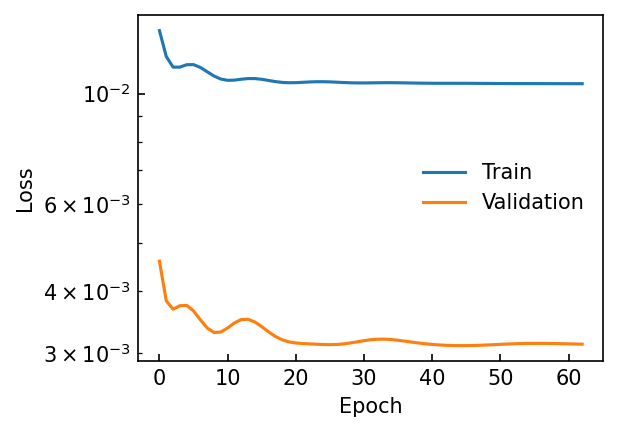

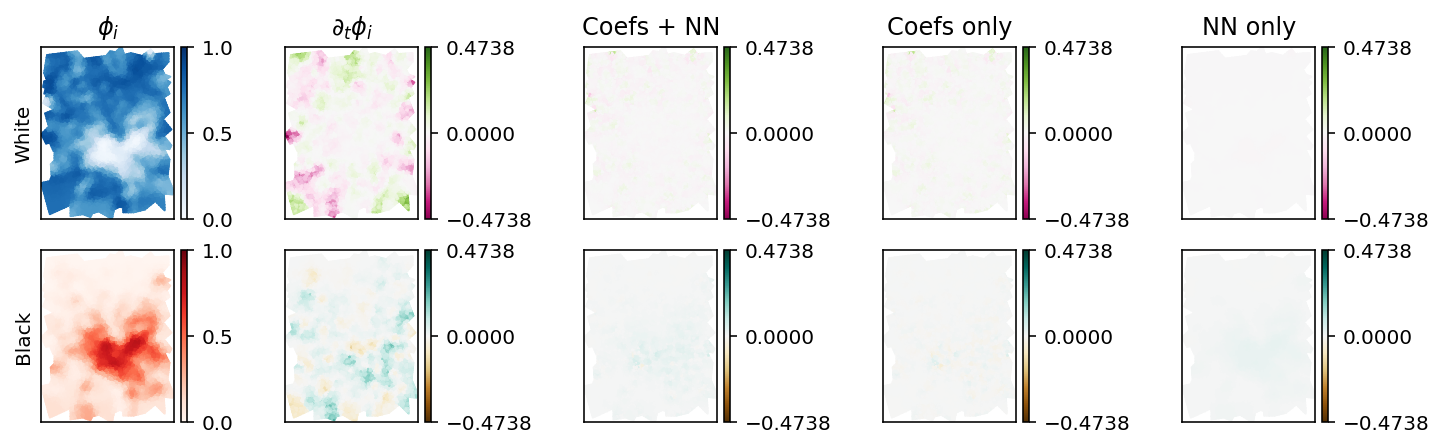

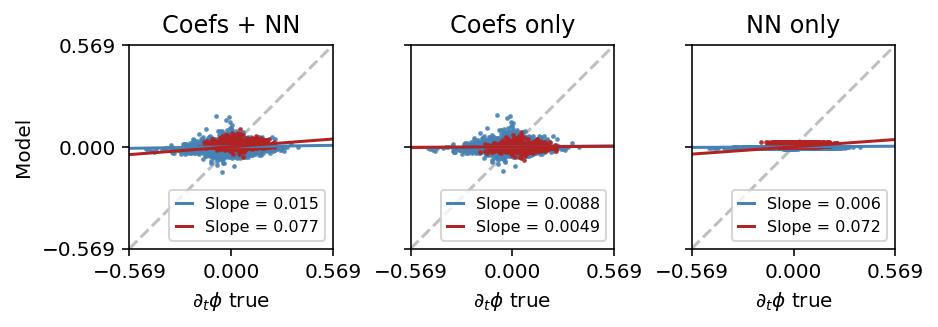

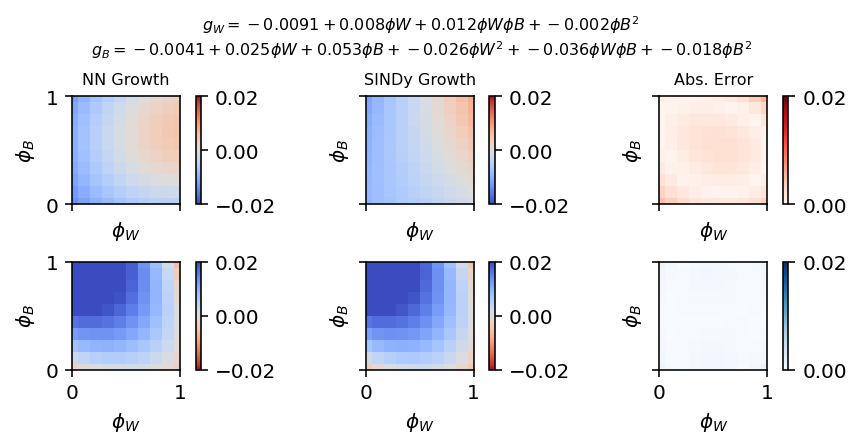

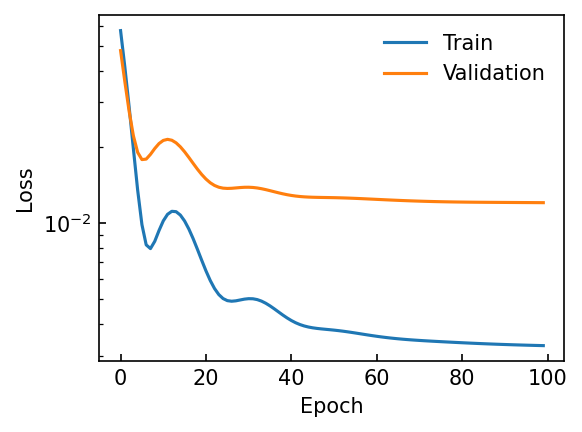

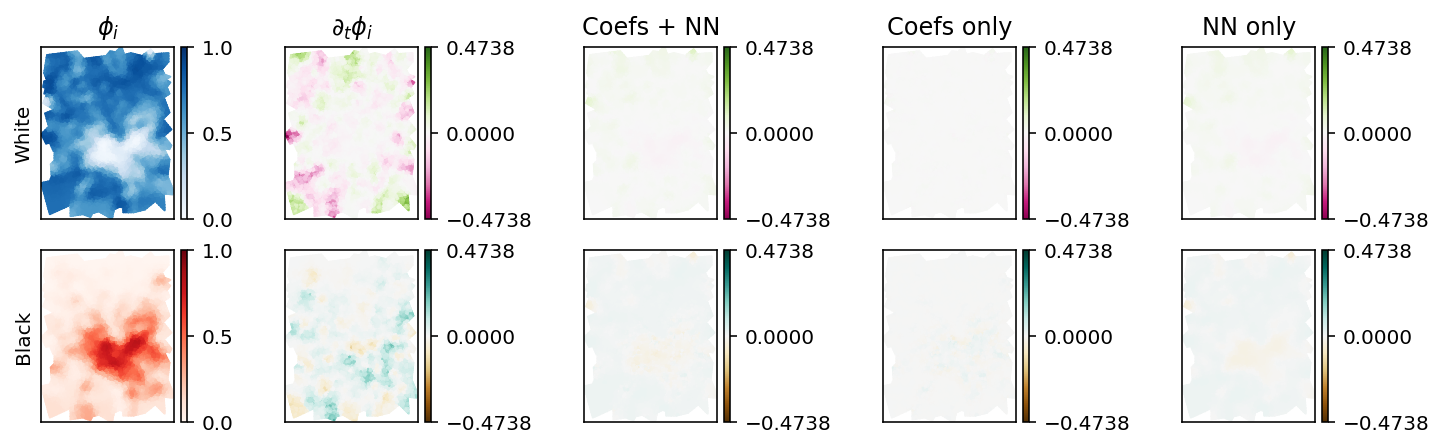

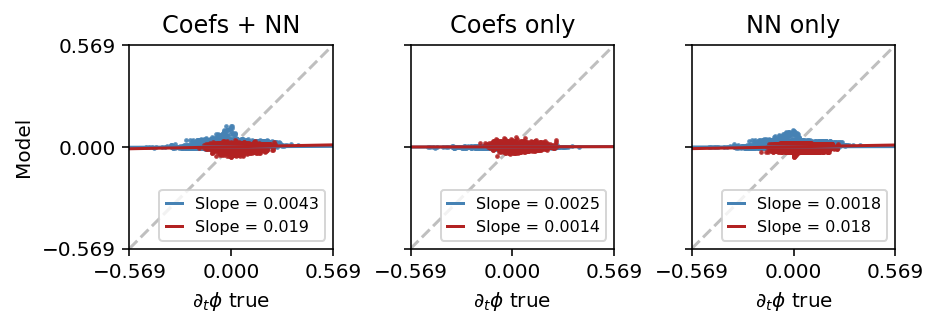

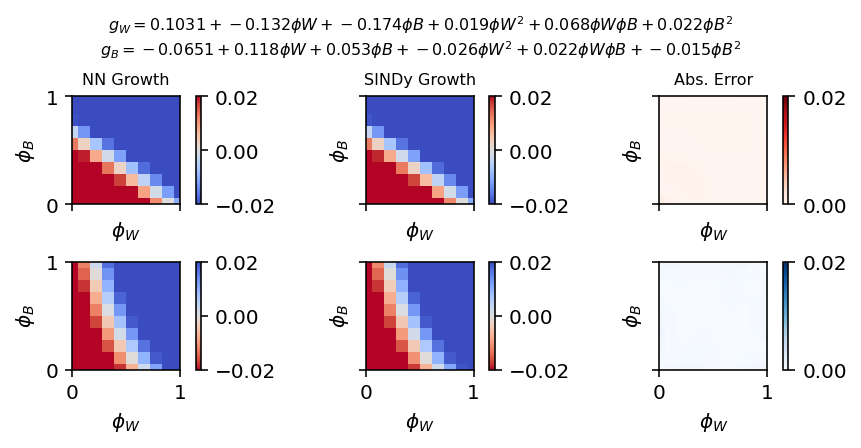

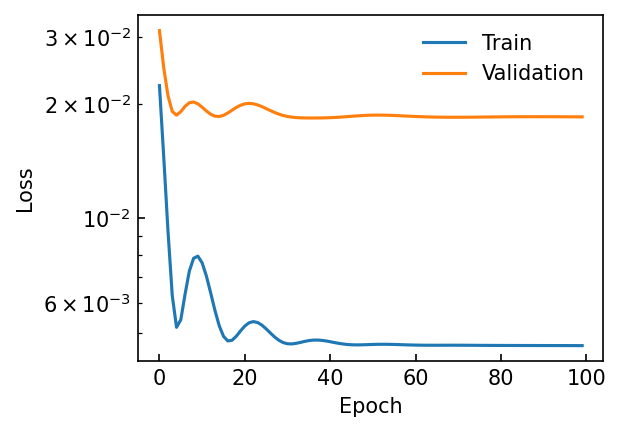

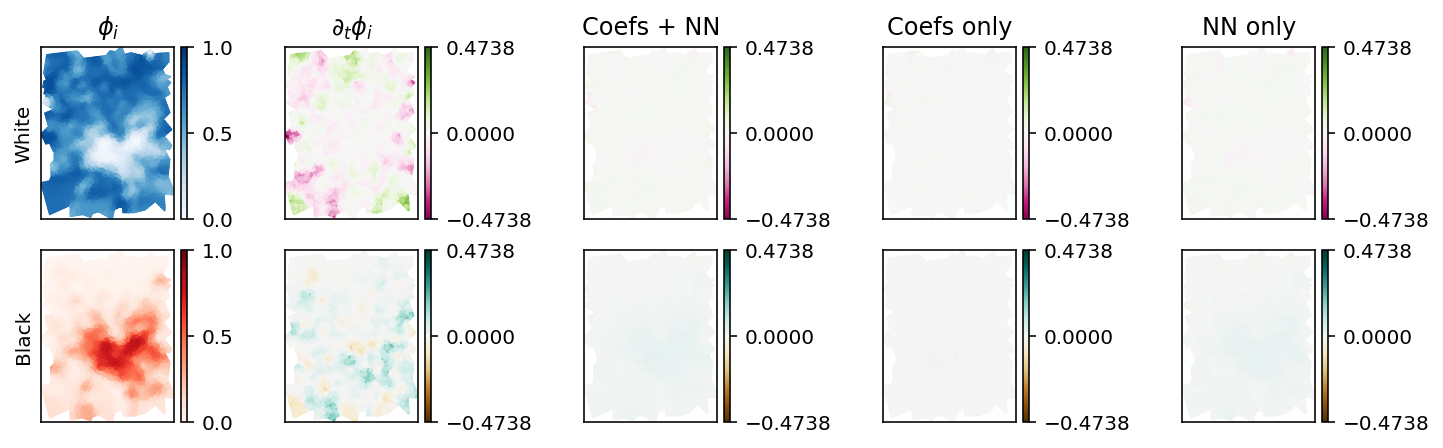

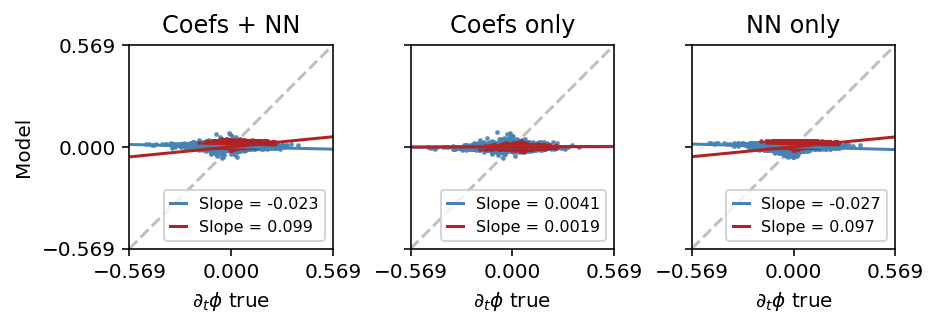

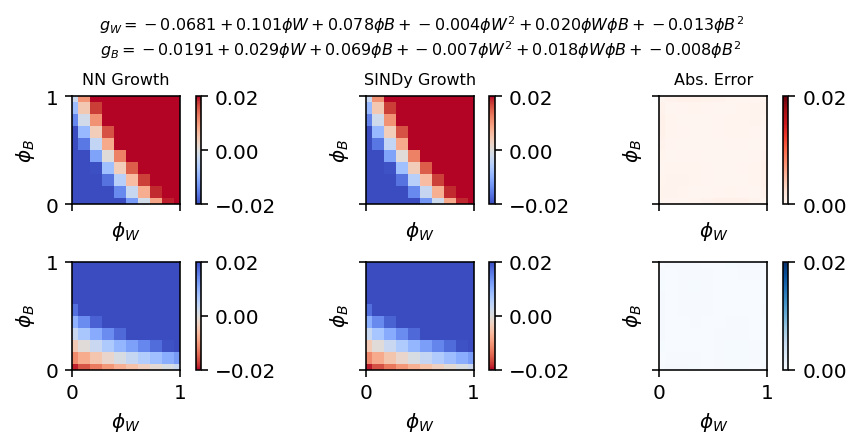

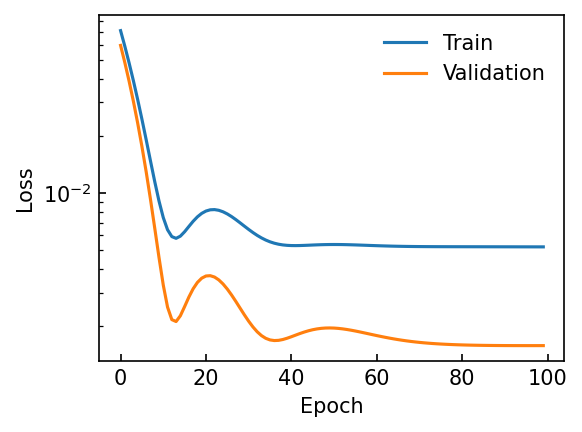

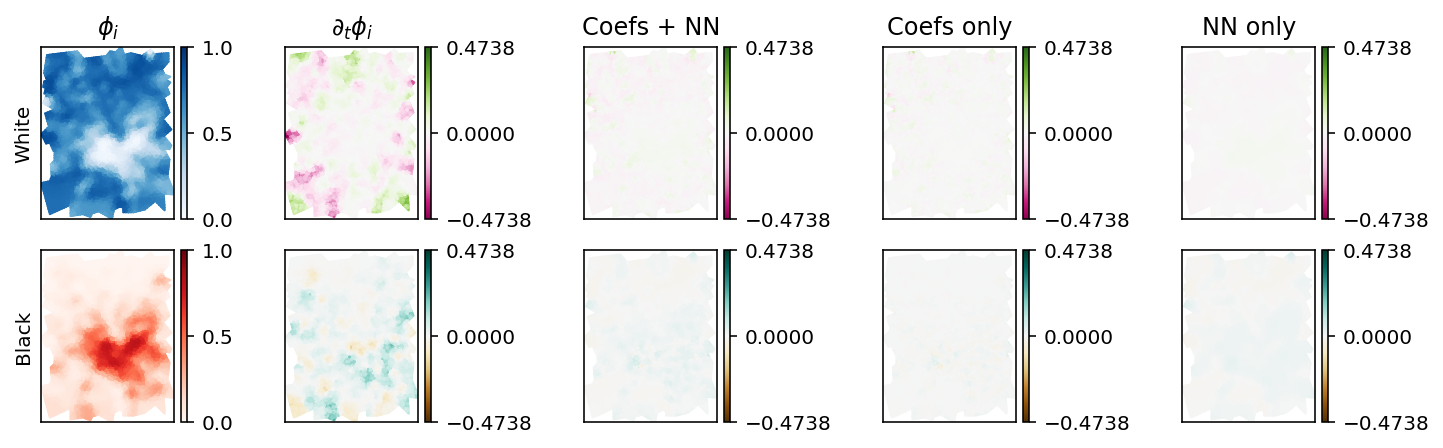

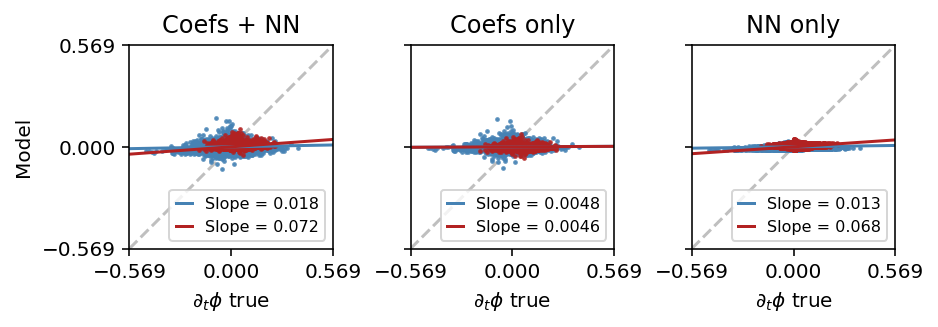

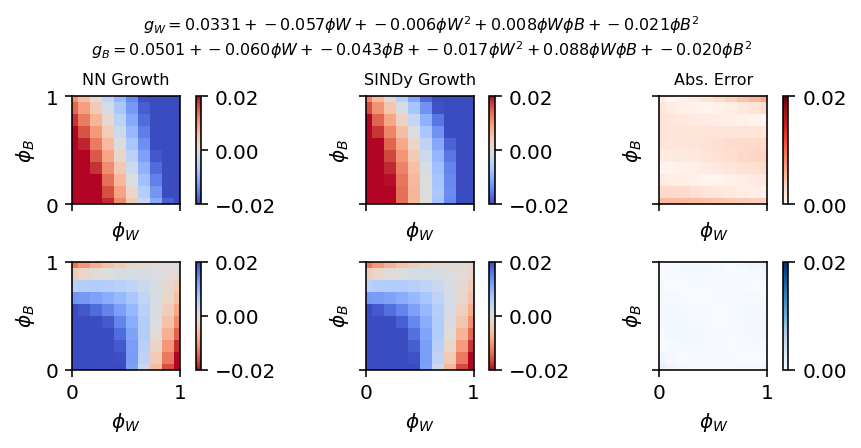

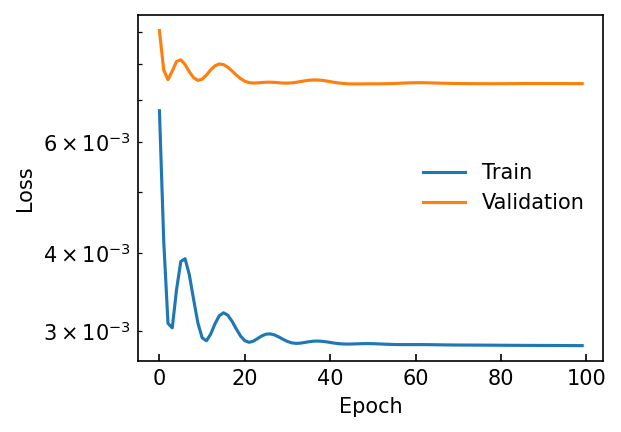

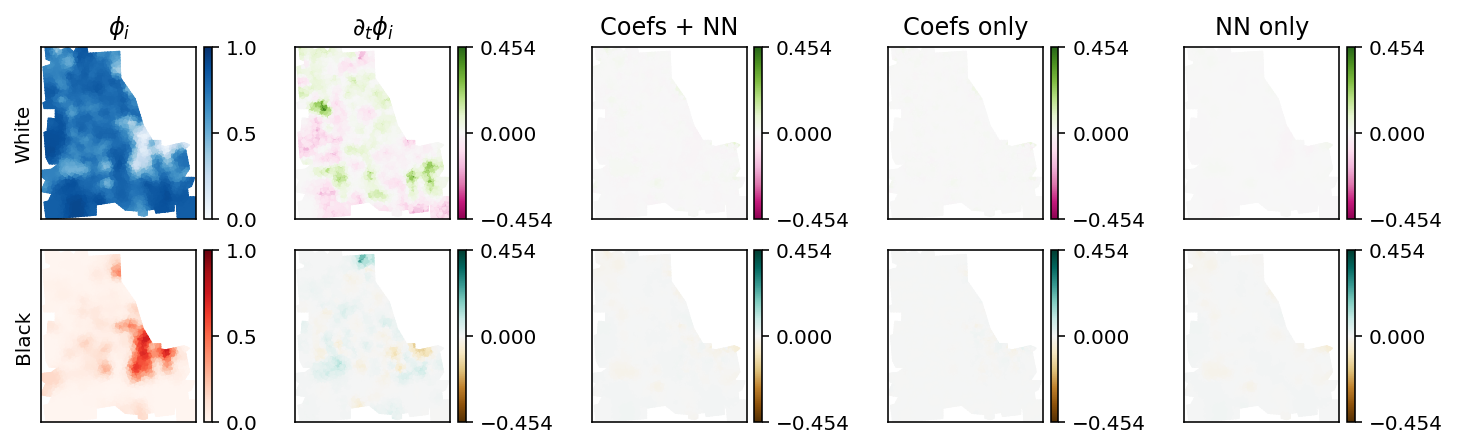

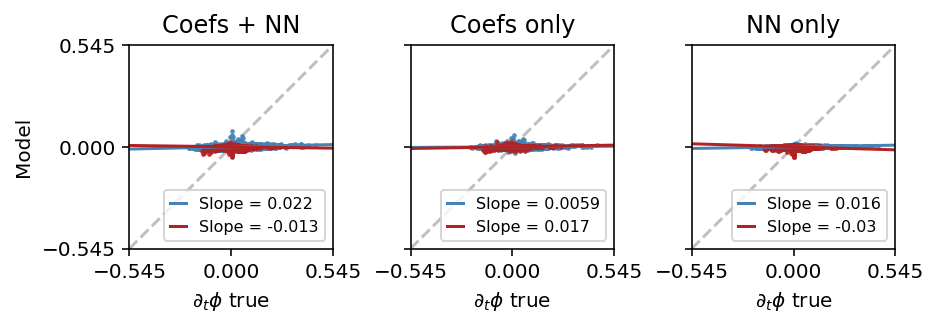

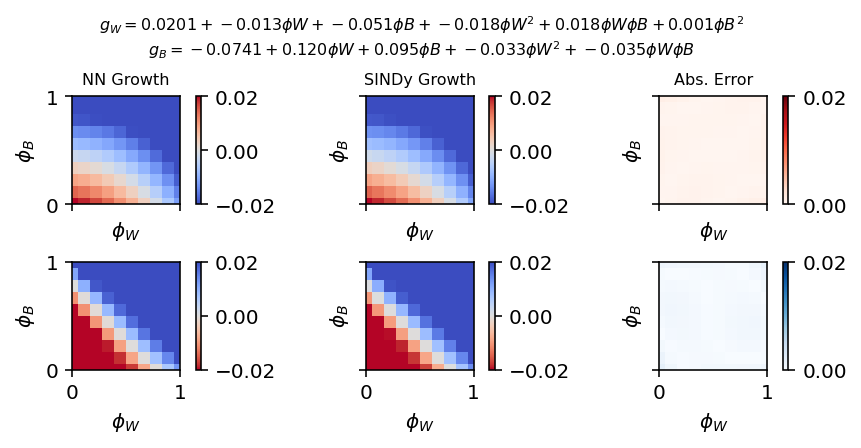

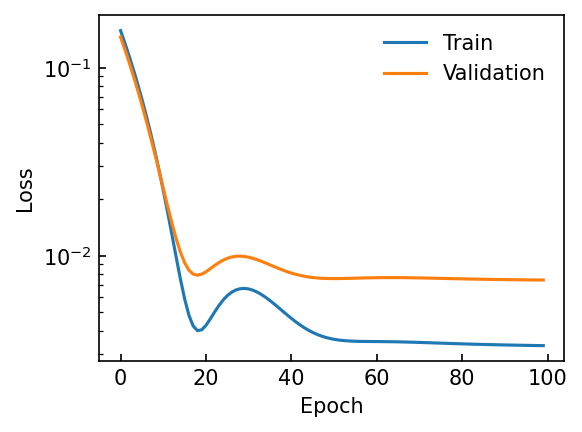

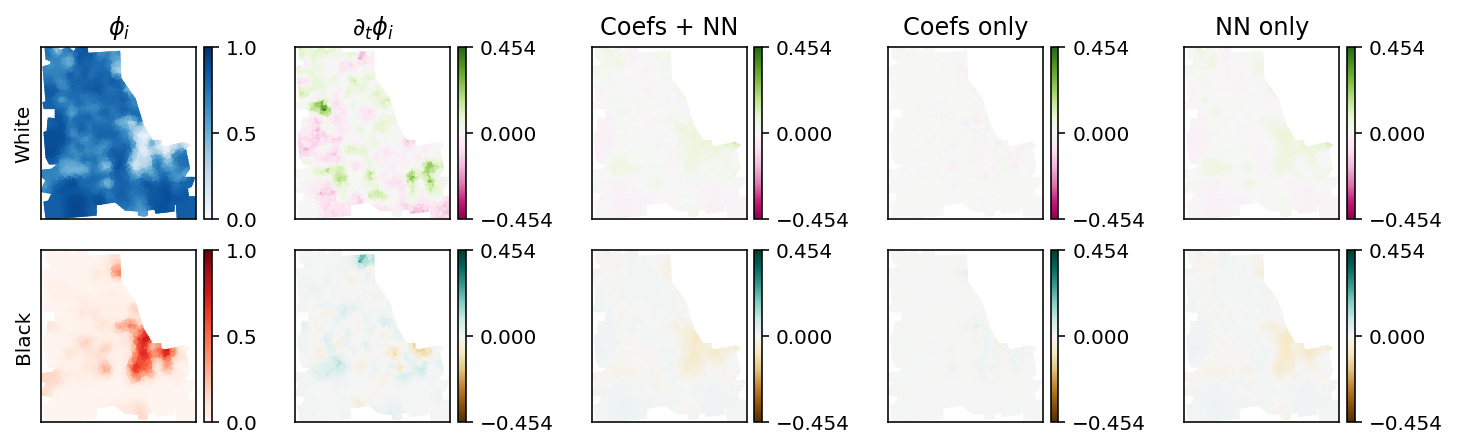

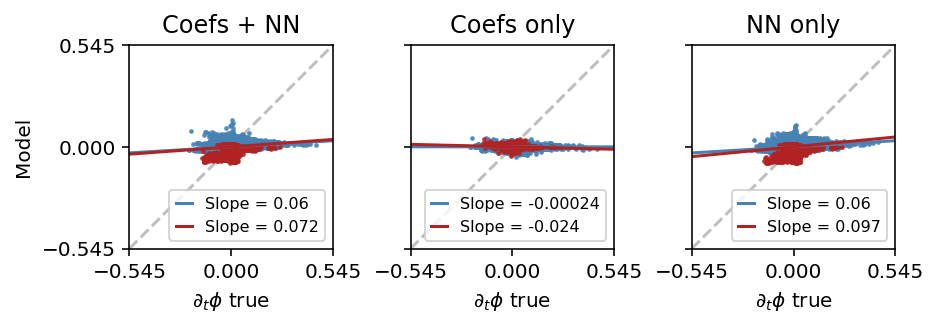

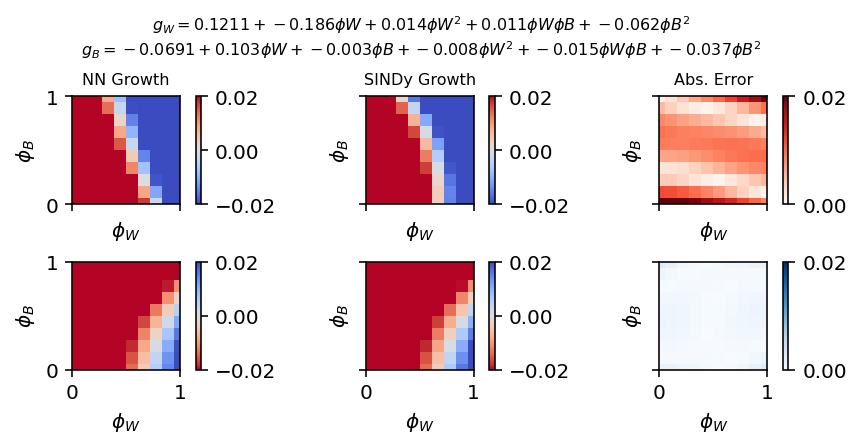

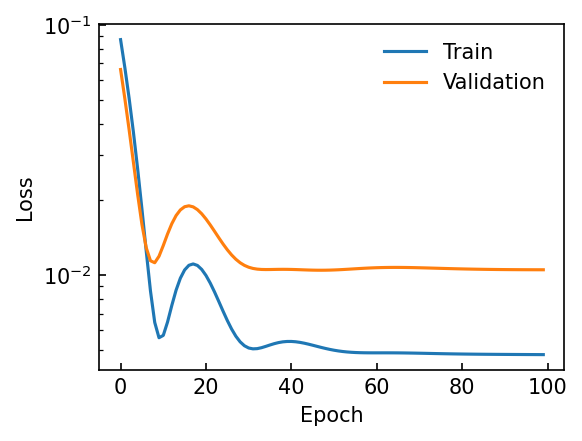

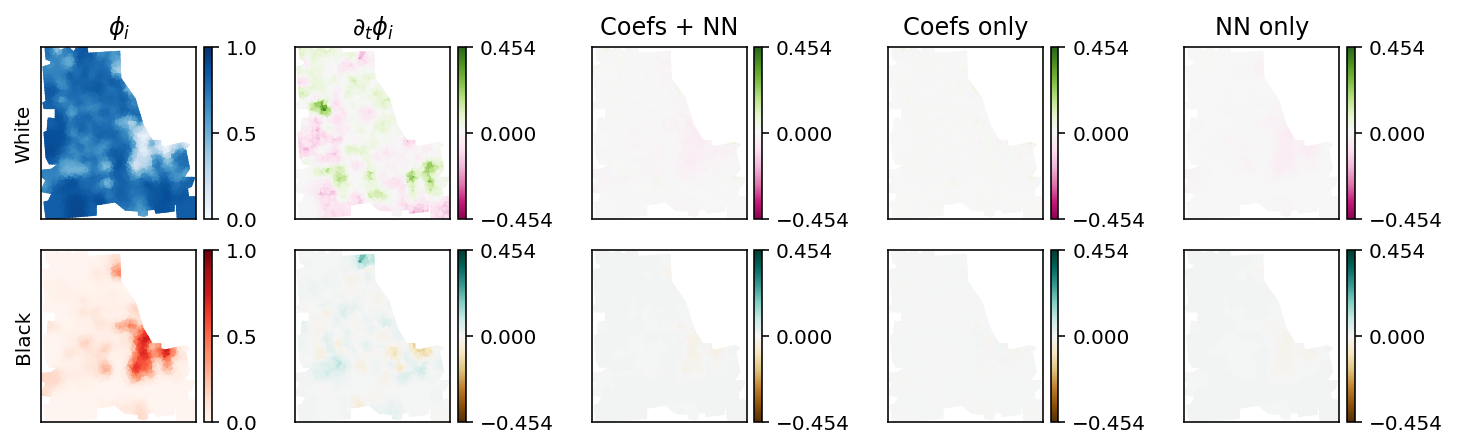

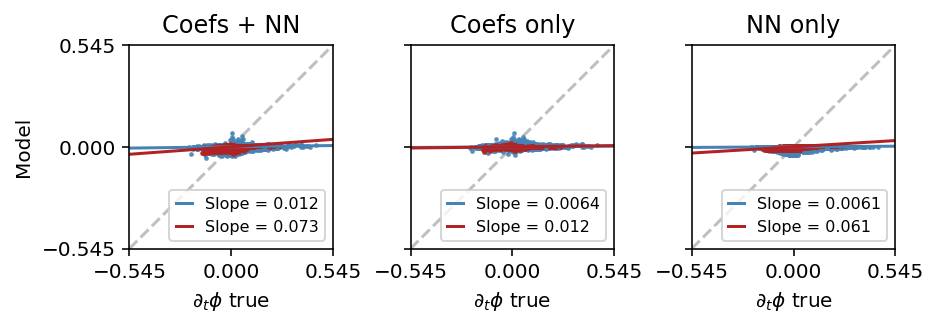

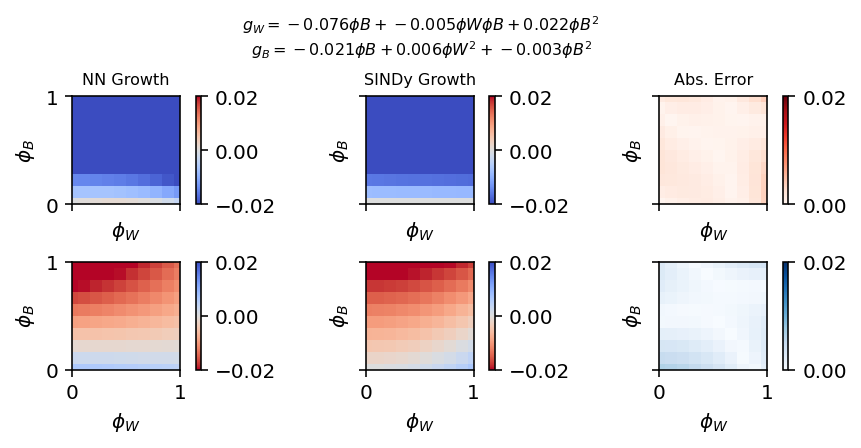

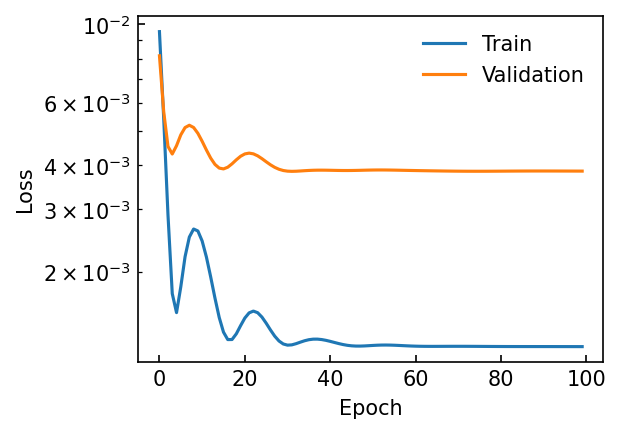

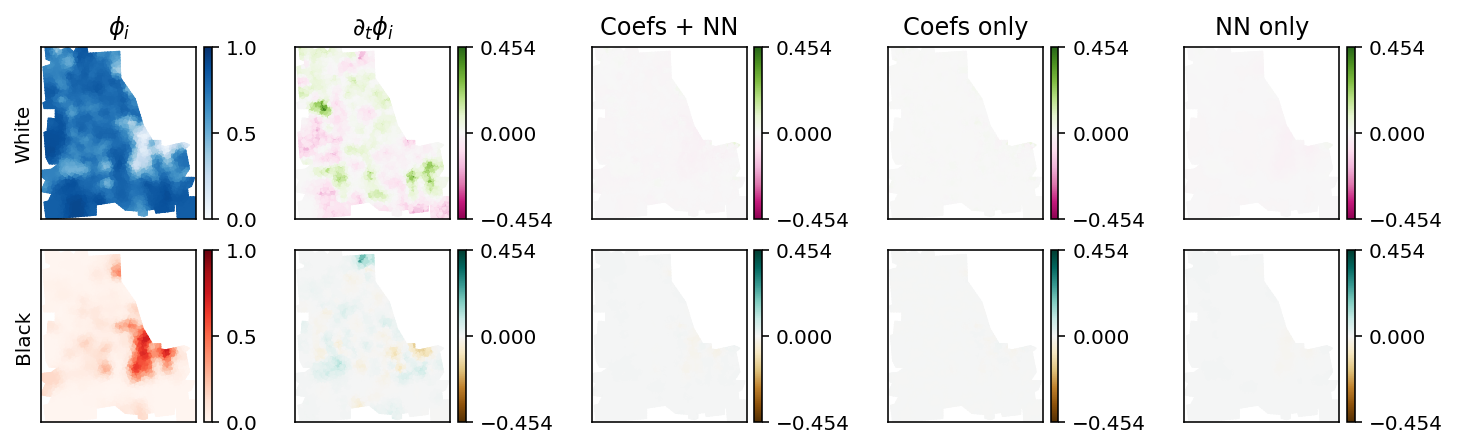

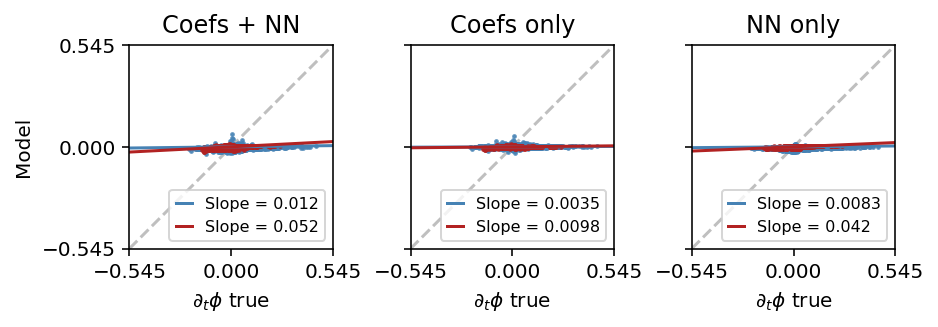

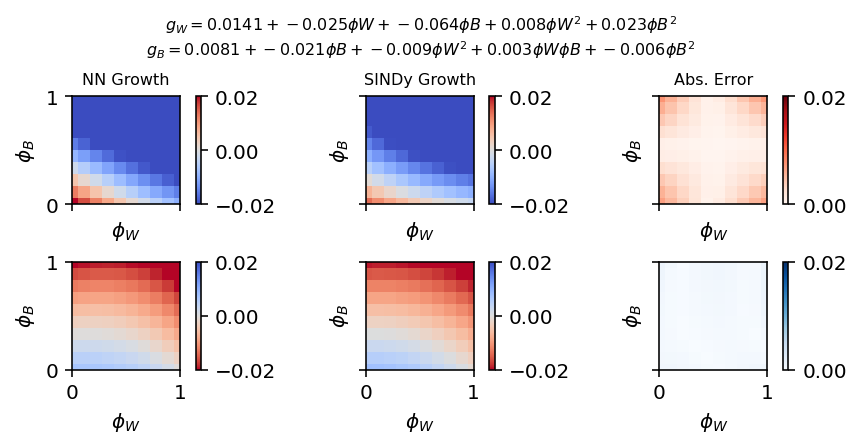

In [5]:
from census_analysis import analysis_pipeline

for model_dir in model_dirs:
    county = "_".join(model_dir.split("/")[-1].split("_")[:2])
    
    analysis_pipeline(model_dir, county=county, printout=True)